In [526]:
# Marc Aaron Bumanglag
# Nicolas Sonder Cay-ohen
# Vincent Josh Padre
# Clinton Visaya

In [527]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# google resource initialization
url = 'https://drive.google.com/file/d/1u0xXyITSJ3gsiZNtfrKMEL3xHjrK-dow/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

# read the dataset
dataset = pd.read_csv(dwn_url)

# Data Filtering and Formatting


In [528]:
# Remove null values
# Note: null values are important too, but in this context it is not. Since most of our operations requires grouping and filling missing values might ruin the dataset
dataset = dataset[~(dataset['Race'].isna())
                & ~(dataset['Age'].isnull())
                & ~(dataset['Sex'].isnull())
                & ~(dataset['ResidenceCity'].isnull())
                & ~(dataset['DeathCity'].isnull())
                & ~(dataset['Date'].isna())
                & ~(dataset['MannerofDeath'].isna())]

#Insight No. 1
#Temporal trends: Analyze changes in drug overdose death rates over the
#years. E.g., identify any spikes or declines in specific years.

In [529]:
# Creates a separate dataframe to manipulate to avoid the original to be edited
# Isolate the month/day/year string

sub_set_date_y = pd.DataFrame()
sub_set_date_y['Date'] = dataset['Date'].str[:-11]

# Further filters the date values to only isolate year
# Takes all the unique occurence of year and its corresponding count

years = sub_set_date_y['Date'].str[-5:].value_counts().index
deaths_y = sub_set_date_y['Date'].str[-5:].value_counts().values

# Sorts the year in an ascending manner
# Creates new dataframe for plotting
sub_set_date_y = pd.DataFrame({'Year' : years, 'Drug Deaths' : deaths_y})
sub_set_date_y = sub_set_date_y.sort_values('Year').reset_index(drop=True)

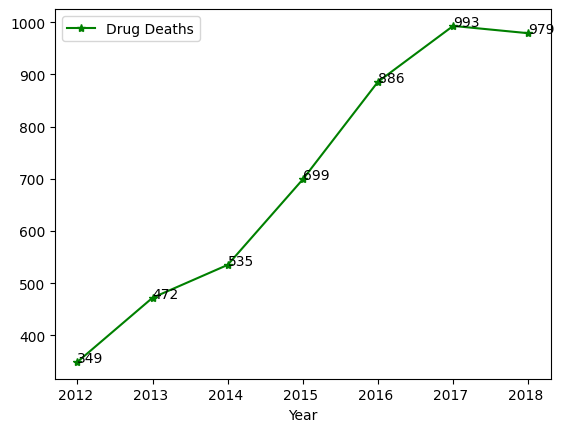

In [530]:
sub_set_date_y.plot.line(x='Year', y='Drug Deaths', marker='*', c='Green')

# Add value labels to the plot
for i in range(len(sub_set_date_y['Year'])):
  plt.text(int(i), int(sub_set_date_y['Drug Deaths'][i]), sub_set_date_y['Drug Deaths'][i], ha='left')


# Discussion
The graph illustrates the following
* From 2012 to 2018 the drug deaths grew by 280% peaking at 2017 with a 284% growth

* It can also be seen that the steepest growth of the spike is from 2015 to 2016 with a staggering 27% increase

* However it can also be seen the graph is starting to dip down from 2017 to 2018



# Insight No. 2
# Seasonal Patterns: Investigate if there are any seasonal variations in overdose
# death rates. Determine if certain times of the year have higher incidences.

In [531]:
# Process are the same as insight 1 the only difference is we are isolating the month value now

sub_set_date_m = pd.DataFrame()
sub_set_date_m['Date'] = dataset['Date'].str[:2]

months_m = sub_set_date_m['Date'].value_counts().index
deaths_m = sub_set_date_m['Date'].value_counts().values

sub_set_date_m = pd.DataFrame({'Months' : months_m, 'Drug Deaths' : deaths_m})
sub_set_date_m = sub_set_date_m.sort_values('Months').reset_index(drop=True)

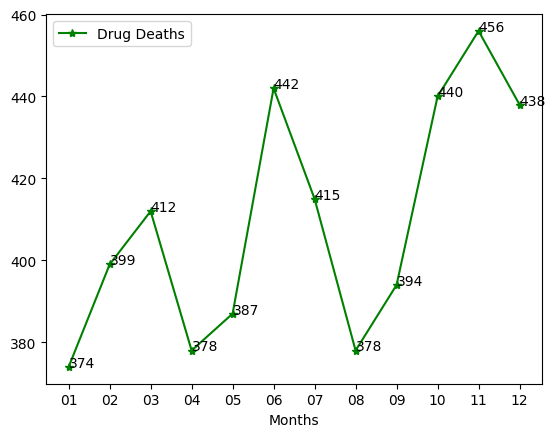

In [576]:
sub_set_date_m.plot.line(x='Months', y='Drug Deaths', marker='*', c='Green', xticks=[i for i in range(12)])
for i in range(12):
  plt.text(int(months_m[i]) - 1, int(deaths_m[i]), f'{deaths_m[i]}', ha='left')

# Discussion
The graph illustrates the following
* The drug deaths peaks at the month of November with a total of 456 deaths during that month.

* It can also be seen that the steepest growth of the spike is from May to June with a 14% increase. While it can be noticed that the value dipped from July to June with a 15% decrease.

* The graph can be seen to have an alternating pattern of having 2 months to grow and shrink.


# Insight No. 3
# Historical Context: Relate changes in overdose death rates to historical
# events, such as the introduction of new drug policies, economic downturns, or
# significant public health campaigns

In [533]:
# Same filtering process as insight no. 1

sub_set_date_hy = pd.DataFrame()
sub_set_date_hy['Date'] = dataset['Date'].str[:-11]

h_years = sub_set_date_hy['Date'].str[-5:].value_counts().index
deaths_hy = sub_set_date_hy['Date'].str[-5:].value_counts().values

sub_set_date_hy = pd.DataFrame({'Year' : years, 'Drug Deaths' : deaths_y})
sub_set_date_hy = sub_set_date_hy.sort_values('Year').reset_index(drop=True)

# Use historical context as markers instead of drug deaths values
HISTORICAL_CONTEXT = ['Marijuana Legalization',
                      'Opioid Epidemic',
                      'Criminal Justice Reform',
                      'Medical Marijuana Expansion',
                      'Harm Reduction Policies',
                      'Cannabis Banking and Taxation',
                      'Treatment and Prevention']

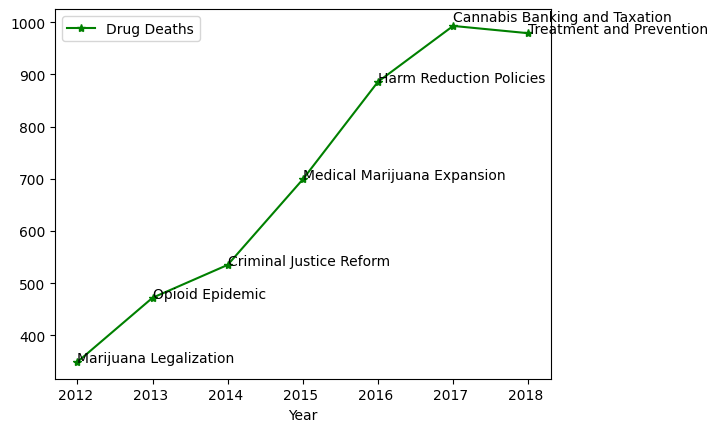

In [534]:
sub_set_date_hy.plot.line(x='Year', y='Drug Deaths', marker='*', c='Green')

for i in range(len(sub_set_date_hy['Year'])):
  plt.text(int(i), int(sub_set_date_hy['Drug Deaths'][i]) + (10 if i == 5  else 0), HISTORICAL_CONTEXT[i], ha='left')

# Discussion
The following insights can be concluded based on the graph
* Historical context does have an effect to the increase of drug deaths overdose. Various laws have been passed to have an ease of access to drugs. Consequently, those years also saw a dramatic increase in their drug deaths.
* However as some anti drug protocols where introduced, we can see that the trend starts to dip down.

# Insight No. 4

# Drug Type Analysis: Determine which drugs are most frequently involved in
# overdose deaths. E.g., increases in opioid-related deaths.

In [535]:
# Since the use of a certain drugs is represented in a one-hot manner
# Where columns are used to represent the drug type
# And boolean 1 and 0 are used to represent if a certain individual uses them
# Our goal is to only extract the columns for each drugs

list_of_drugs = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid']

# Take the difference of columns we want to remove and we want to keep
# Can be simply denoted as col_to_remove = (All columns) - (columns we want to keep)
col_to_remove = dataset.columns.difference(list_of_drugs)

# Removes all the columns
one_hot = dataset.drop(columns=col_to_remove, axis=1)


# Single drug-induced deaths

[2371]


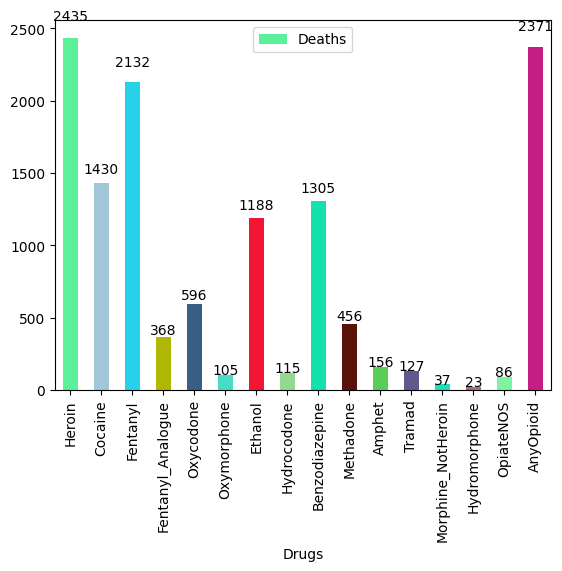

In [559]:
temp_dict = {}

# Iterate through all the list of drugs counting all the occurences of both 0 and 1
# Only keeps the counted occurence of 1
# Since .values return an array type, extract the only value inside the array hence the use of [0]
for drugs in list_of_drugs:
  temp_dict[drugs] = (one_hot[drugs].value_counts().values[1:2])[0]

# Creates another subset for plotting
df_subset = pd.DataFrame({'Drugs' : temp_dict.keys(), 'Deaths' : temp_dict.values()})

# Generate multiple color to differentiate data
colors = [(random.random(), random.random(), random.random(), 1) for i in range(len(temp_dict.keys()))]

df_subset.plot.bar(x='Drugs', y='Deaths', color = colors)

# Marks the total count for better readability
for i in range(len(list_of_drugs)):
  val = df_subset['Deaths'][i]
  plt.text(i, val + max(val * 0.05, 5), str(val), ha='center')




# Discussion
The following conclusions can be found on the graph
* The top 3 leading cause of drug deaths are Heroin, Opioid, and Fentanyl. While the top 3 drugs that has a low death rates are, Hydromorphone, Morphine, and OpiateNOS

* It can also be seen that top 3 cause of drug deaths is more lethal than the rest combined.


# Multiple drugs-induced deaths

In [562]:
most_common = {}

# Limits the display to only top 20 most common to avoid rendering error
GROUPS = 20

# Iterate through all of the one hot values
for pairs in one_hot.values:
  # Create a temporary pair to store the combination pairs
  temp_pair = []

  for i in range(len(pairs)):
    # Skips over invalid values
    if (pairs[i] != '0' and pairs[i] != 0) and (pairs[i] != '1' and pairs[i] != 1):
        continue
    # Builds the pair
    if(pairs[i] == 1 or pairs[i] == '1'):
      temp_pair.append(list_of_drugs[i])

  # Checks if the value only accounts for single drug induced death
  # If yes skips it since single drug induced death is already calculated
  if len(temp_pair) <= 1:
    continue

  # Use the combination as keys, and sets up a counter for each value count
  if most_common.get(tuple(temp_pair)) is not None:
    most_common[tuple(temp_pair)] += 1
  else:
    most_common[tuple(temp_pair)] = 1

# Sorts the data on a descending order
sorted_dict = dict(sorted(most_common.items(), key=lambda item : -item[1]))

grouped_df = pd.DataFrame({'Drugs' : list(sorted_dict.keys())[0:GROUPS], 'Deaths' : list(sorted_dict.values())[0:GROUPS]})



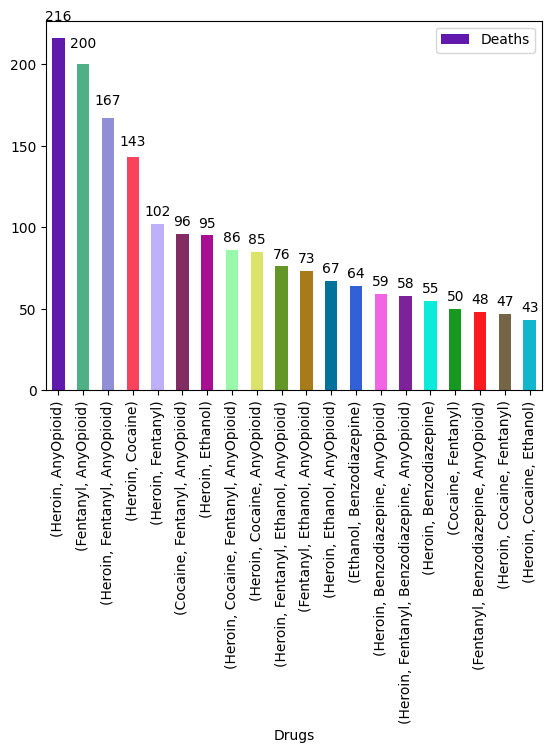

In [563]:
# Plot the data
colors = [(random.random(), random.random(), random.random(), 1) for i in range(len(grouped_df))]

grouped_df.plot.bar(x='Drugs', y='Deaths', color = colors)

for i in range(len(grouped_df)):
  val = grouped_df['Deaths'][i]
  plt.text(i, val + max(val * 0.05, 5), str(val), ha='center')

# Discussion
The following conclusions can be found on the graph
* The most lethal combination of drug intake is Heroin and Opioid, followed by Fentanyl and Opioid, and the 3 of them combined take the number 3 spot.

* The lethality of various drug combinations varies depending of its composition.

# Insight No. 5
# Age specific trends: Investigate how overdose death rates by age for each
# independent drug used. (Opium, Meth, Heroin, etc.)

In [539]:
# Define total number of groups
GROUPS = 5

# Partition the group
age_min, age_max = dataset['Age'].min(), dataset['Age'].max()
age_step = (age_max - age_min) // GROUPS

# Iterate through all group creating multiple dataframes with their corresponding groups as key
age_group_count_drugs = {}
for i in range(GROUPS):
  age_group = (age_min + (age_step * i), age_min + (age_step * (i + 1)))
  list_of_deaths = []

  # Iterate through all of the list of drugs to count the death occurence per drug type in a specific age group
  for drugs in list_of_drugs:
    list_of_deaths.append(len(dataset[(dataset['Age'] >=  age_group[0]) & (dataset['Age'] <=  age_group[1]) & ((dataset[drugs] == 1) | (dataset[drugs] == '1'))]))

  age_group_count_drugs[age_group] = pd.DataFrame({'Drugs' : list_of_drugs,'Deaths' : list_of_deaths})

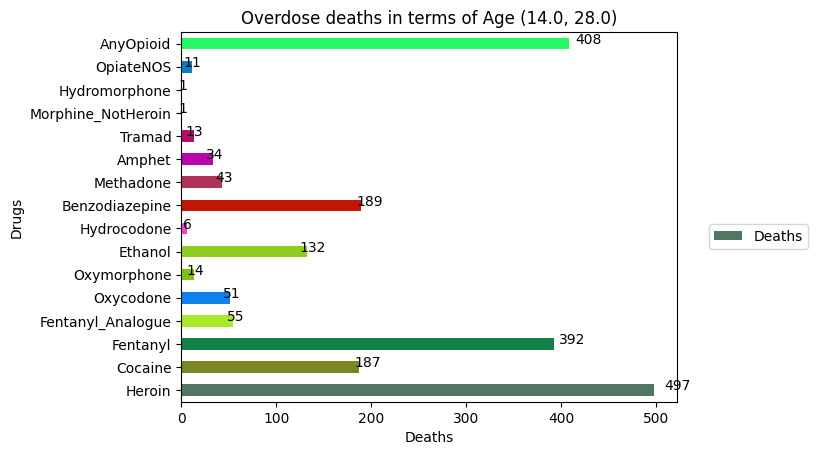

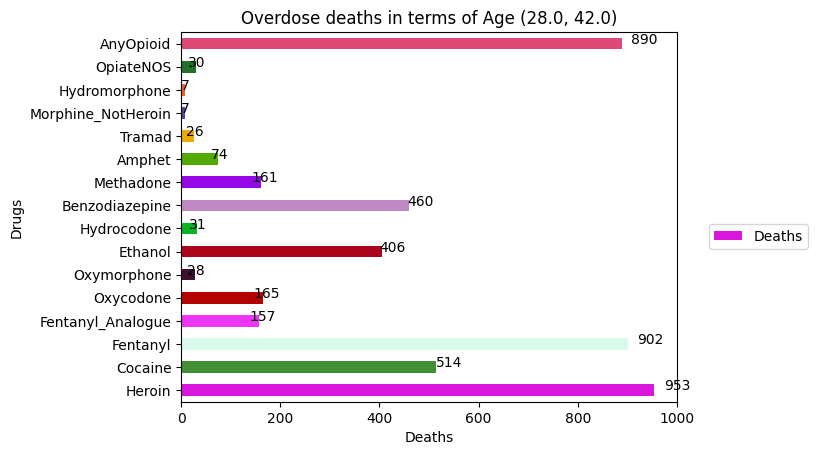

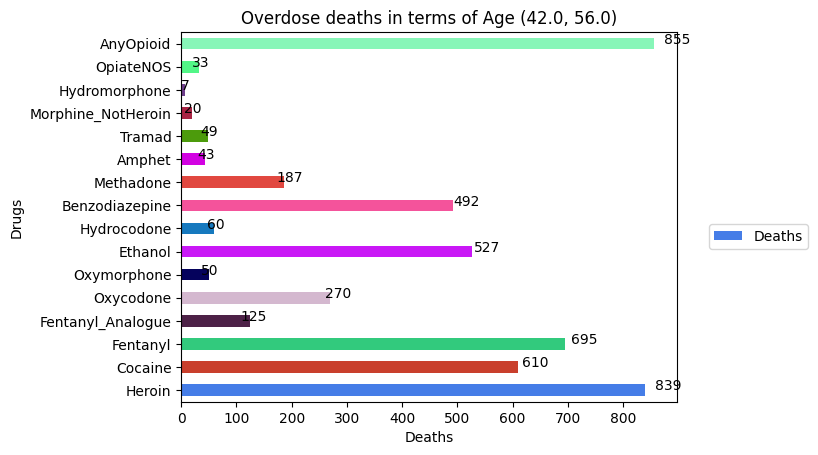

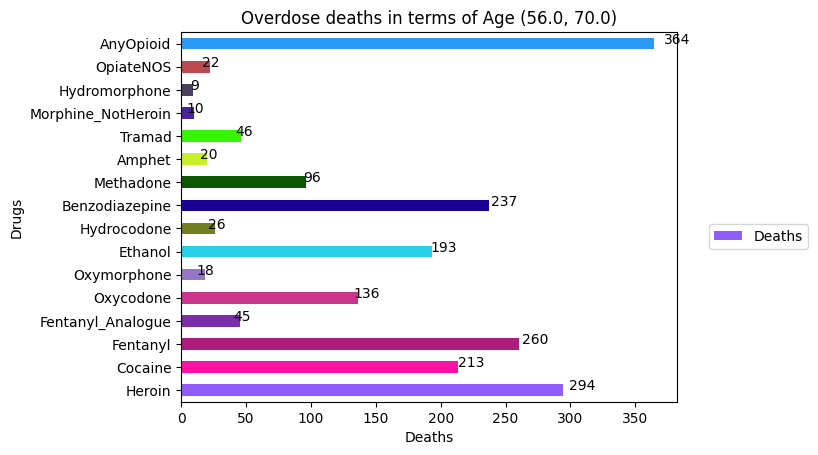

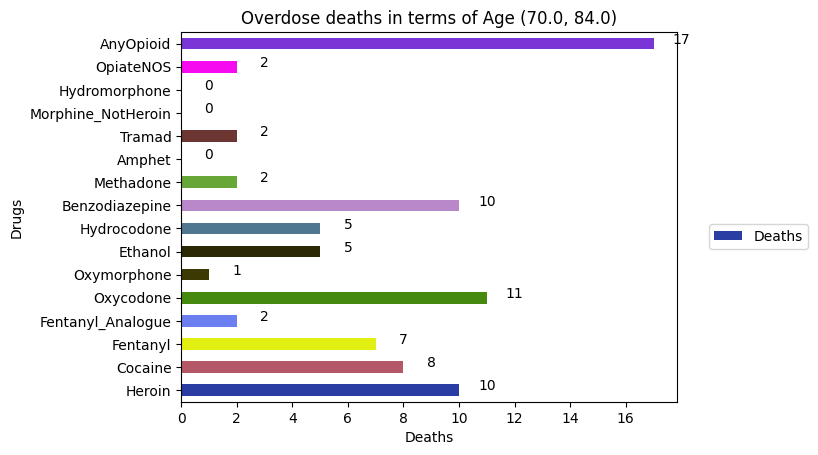

In [568]:
# Plots every age group by extracting their data by their correspoding key
for key in age_group_count_drugs.keys():
  colors = [(random.random(), random.random(), random.random(), 1) for i in range(len(age_group_count_drugs[key]))]
  age_group_count_drugs[key].plot.barh(x='Drugs', y='Deaths', xlabel='Deaths', ylabel='Drugs', color = colors, title='Overdose deaths in terms of Age ' + str(key))
  plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5))

  for i in range(len(list_of_drugs)):
    val = age_group_count_drugs[key]['Deaths'][i]
    plt.text(val + max(val * 0.05, 1), i, str(val), ha='center')

# Discussion
The following information can be extracted from the graphs
* Heroin is the deadliest form of drug for ages 14-42 while opioid's lethality is more noticeable from 42-84

* The concentration of drug related deaths are more present at the ages of 28 to 56.
* Drug related deaths at higher ages falls down even reaching a value of 0

# Insight No. 6
# Sex specific trends: Investigate how overdose death rates by sex for each
#independent drug used. (Opium, Meth, Heroin, etc.)


In [541]:
# Identify all the possible value of sex
# Discard unusable data
dataset['Sex'].value_counts()

Sex
Male       3636
Female     1276
Unknown       1
Name: count, dtype: int64

In [542]:
GROUPS = ('Male', 'Female')
sex_group_count_drugs = {}

# Iterates through the groups counting all the death caused by a specific drug to create multiple subsets
for sex_group in GROUPS:

  list_of_deaths = []

  for drugs in list_of_drugs:
    list_of_deaths.append(len(dataset[(dataset['Sex'] ==  sex_group)  & ((dataset[drugs] == 1) | (dataset[drugs] == '1'))]))

  sex_group_count_drugs[sex_group] = pd.DataFrame({'Drugs' : list_of_drugs,'Deaths' : list_of_deaths})


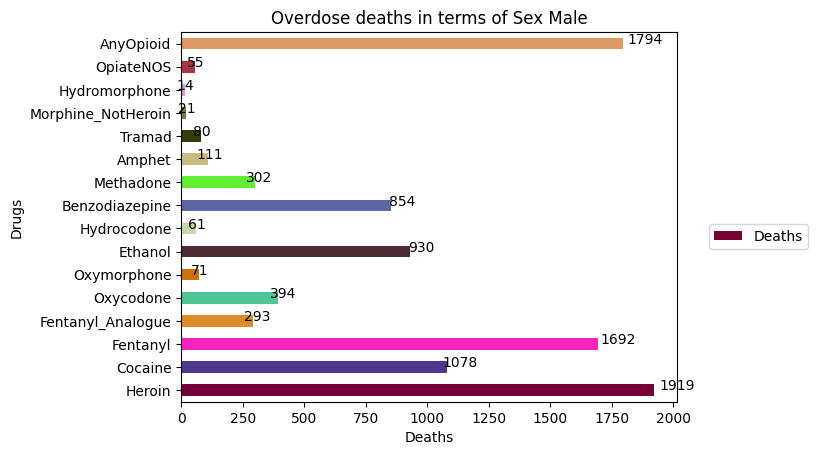

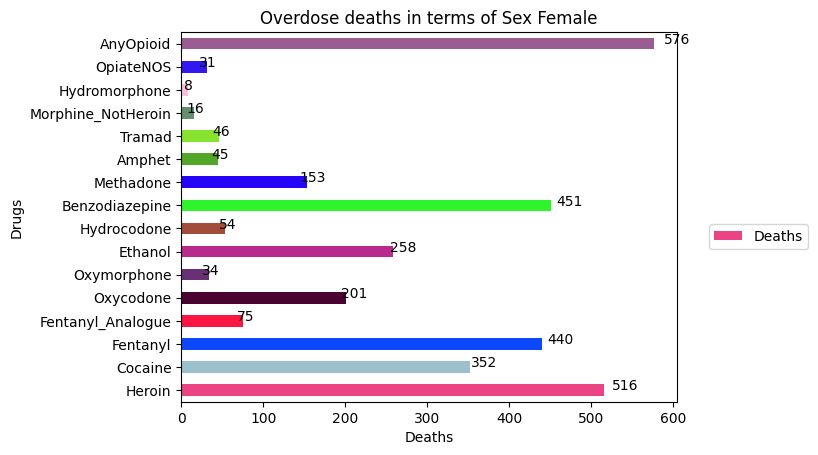

In [569]:
for key in sex_group_count_drugs.keys():

  colors = [(random.random(), random.random(), random.random(), 1) for i in range(len(sex_group_count_drugs[key]))]
  sex_group_count_drugs[key].plot.barh(x='Drugs', y='Deaths', xlabel='Deaths', ylabel='Drugs', color = colors, title='Overdose deaths in terms of Sex ' + str(key))

  plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5), facecolor='white')

  for i in range(len(list_of_drugs)):
    val = sex_group_count_drugs[key]['Deaths'][i]
    plt.text(val + val * 0.05, i, str(val), ha='center')



# Discussion
The following information is presented from the graphs
* Male group has the highest mortality rate with Heroin being the most common drug intake. While the female group's most lethal drug (Opioid) is 3 times lesser than the most lethal drug in the male group.

* It can also be seen that the female group has more variety in terms of drugs they use.

# Inisght No. 7
# Race specific trends: Investigate how overdose death rates by race for each
# independent drug used. (Opium, Meth, Heroin, etc.)

In [544]:
# Checks for all of the possible values of the columns and filters irrelevant data
dataset['Race'].value_counts()
dataset['Race']

1              Black
2              White
3              White
4       Asian, Other
5              White
            ...     
5100           White
5101           White
5102           White
5103           White
5104           White
Name: Race, Length: 4913, dtype: object

In [545]:
GROUPS = list(dataset['Race'].value_counts().index)
GROUPS.remove('Unknown')
tuple(GROUPS)

race_group_count_drugs = {}

# Same process as Insight No.5 and No.6
# Filters the dataset to only account for the deaths of a certain group from a certain drugs
# Creating multiple dataframes for plotting
for race_group in GROUPS:

  list_of_deaths = []

  for drugs in list_of_drugs:
    list_of_deaths.append(len(dataset[(dataset['Race'] ==  race_group)  & ((dataset[drugs] == 1) | (dataset[drugs] == '1'))]))

  race_group_count_drugs[race_group] = pd.DataFrame({'Drugs' : list_of_drugs,'Deaths' : list_of_deaths})

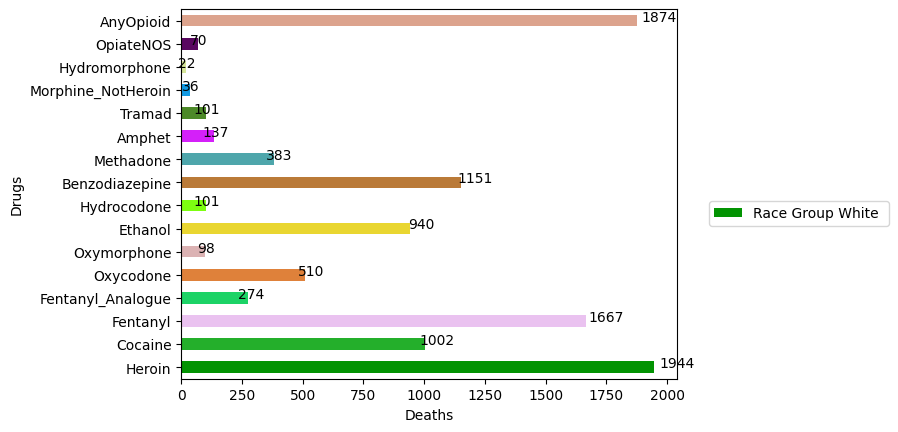

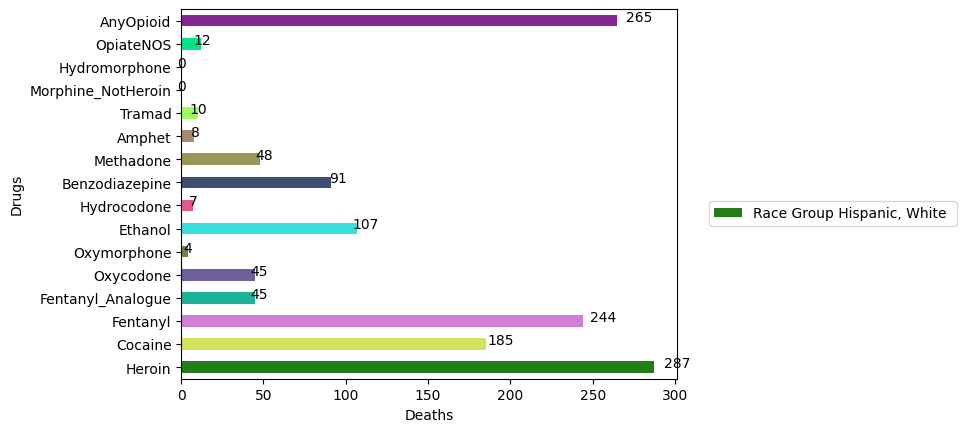

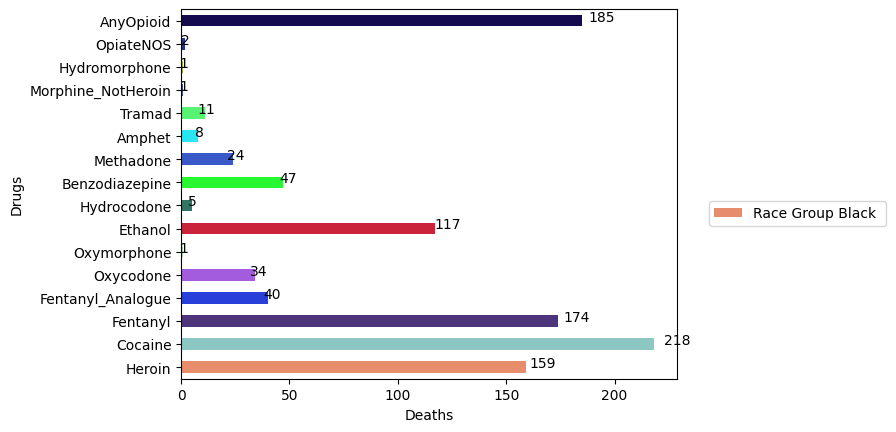

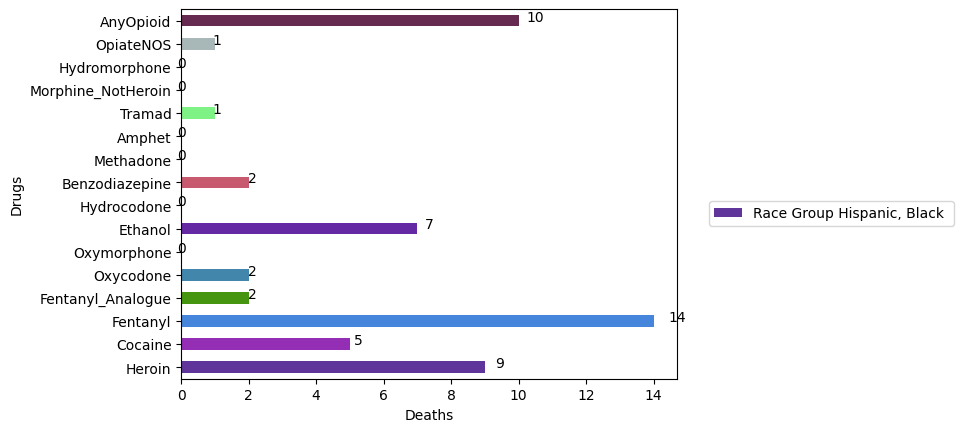

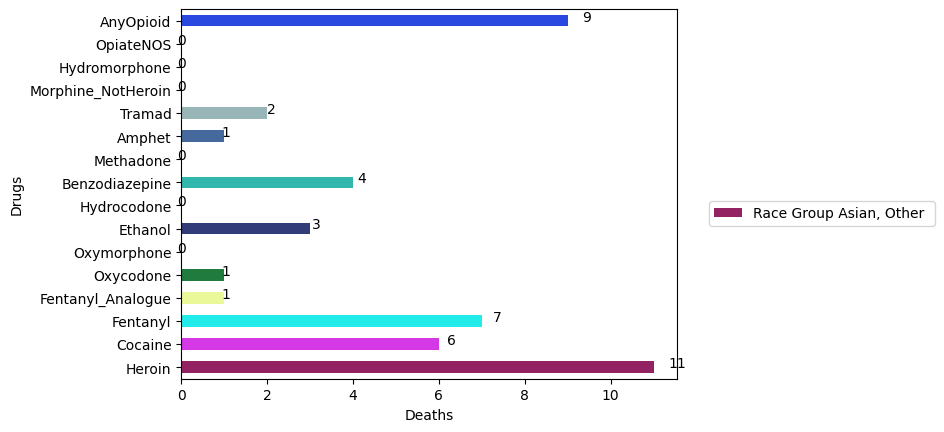

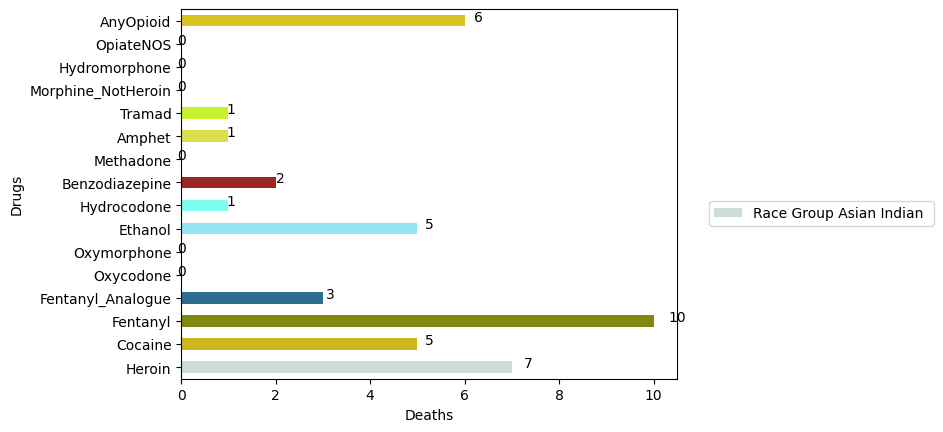

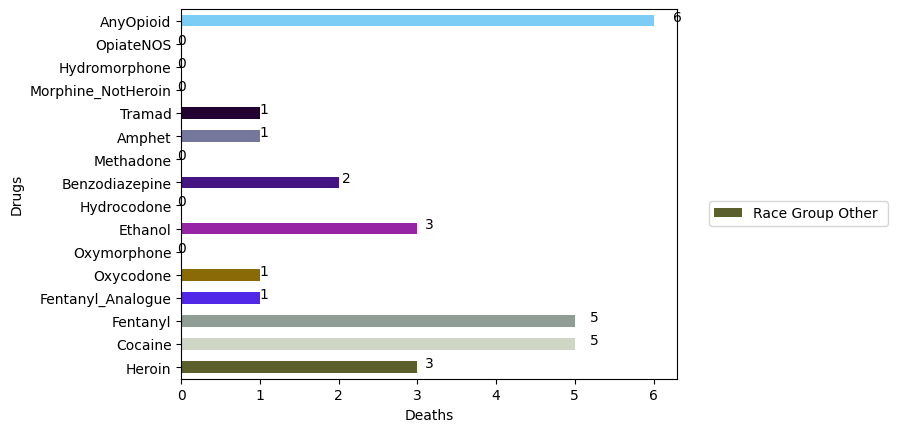

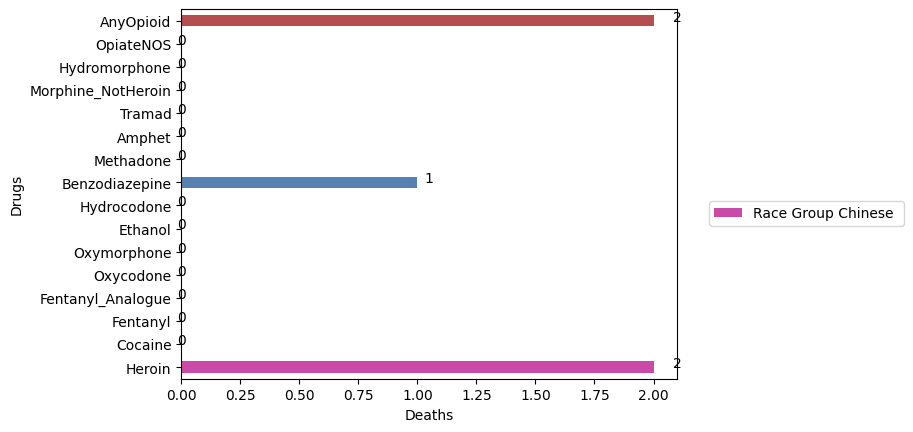

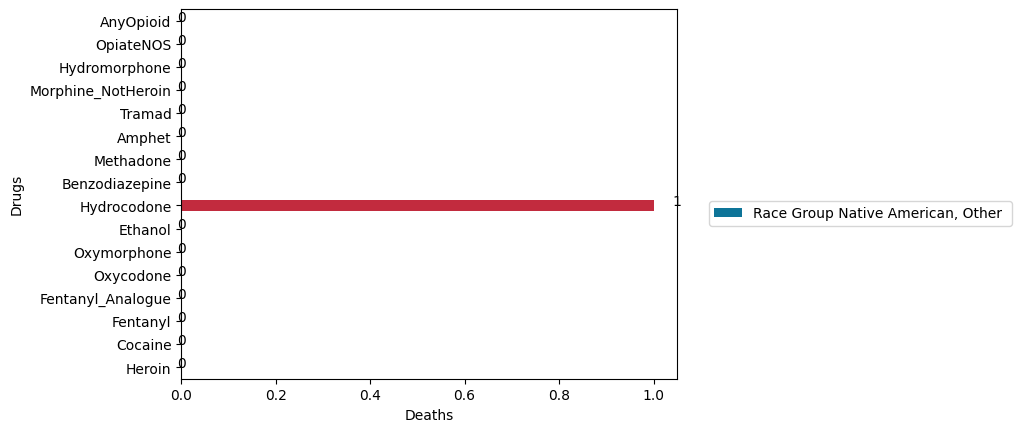

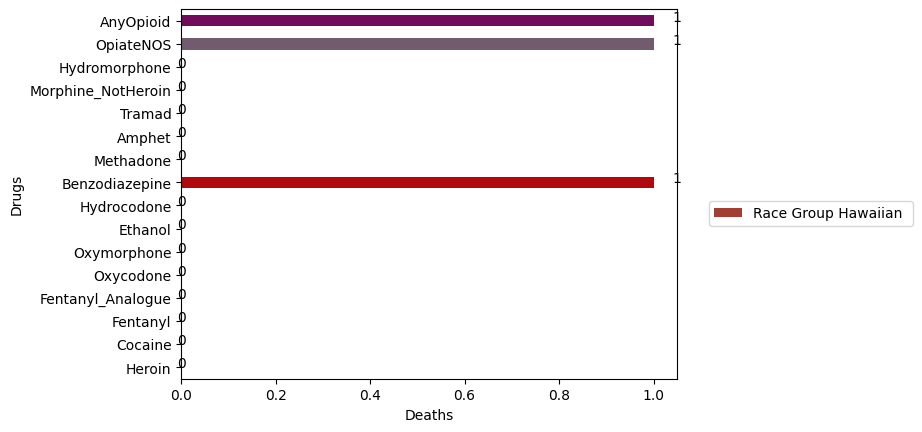

In [546]:
# Plot the subsets
for key in race_group_count_drugs.keys():

  colors = [(random.random(), random.random(), random.random(), 1) for i in range(len(race_group_count_drugs[key]))]
  race_group_count_drugs[key].plot.barh(x='Drugs', y='Deaths', xlabel='Deaths', ylabel='Drugs', label='Race Group ' + str(key) + ' ', color = colors)

  plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5), facecolor='white')

  for i in range(len(list_of_drugs)):
    val = race_group_count_drugs[key]['Deaths'][i]
    plt.text(val + val * 0.05, i, str(val), ha='center')

# Discussion
The following informations can be concluded from analyzing the graph
* Whites are the most common victim of drug overdose, compared to other races.
* Hispanics has also a significant contribution to the death rate of drug overdose.
* While Asians and other race, besides Whites, Hispanice, and Blacks, has the lowest contribution to the death rate of drug overdose.

# Insight No. 8
# Geographic Distribution: Map out overdose death rates by city to identify
# areas with the highest rates. This can help in understanding disparities

In [547]:
# Define all the values we are going to deal with
dataset['DeathCityGeo'].value_counts()

DeathCityGeo
Hartford, CT\n(41.765775, -72.673356)           355
New Haven, CT\n(41.308252, -72.924161)          222
Waterbury, CT\n(41.554261, -73.043069)          220
Bridgeport, CT\n(41.179195, -73.189476)         213
HARTFORD, CT\n(41.765775, -72.673356)           174
                                               ... 
HIGGANUM, CT\n(41.4968, -72.558686)               1
Central Village, CT\n(41.722801, -71.907204)      1
North Branford, CT\n(41.324919, -72.770281)       1
BARKHAMSTED, CT\n(41.927066, -72.911918)          1
CENTRAL VILLAGE, CT\n(41.722801, -71.907204)      1
Name: count, Length: 371, dtype: int64

In [548]:
# Filters the data to create an array of all the possible values
subset = dataset['DeathCityGeo'].value_counts().index

coordinates = []

# Further filters the data by isolating the coordinates of the city
# Stores the coordinate to an array for further processing
for val in subset:
  val = val[val.find('\n') : ]
  loc = val.find(',')
  tup = tuple((val[2:loc], val[loc + 1 : -2]))
  coordinates.append(tup)

# Calculate the mean x coordinate and y coordinate to properly calculate the offset or distance from the most concentrated region of the dataset
mean_x = 0
mean_y = 0
for coordinate in coordinates:
  mean_x += float(coordinate[0])
  mean_y += float(coordinate[1])

mean_x = mean_x / len(coordinates)
mean_y = mean_y / len(coordinates)

# Creates a list to store all the offsets
# Creates a list of colors to properly label values per quadrant
x_distance_from_mean = []
y_distance_from_mean = []
colors = []

# Calculate offsets and assigning them a colors based on their quadrant
# Uses cartesian quadrants to cluster and group offsets

for coordinate in coordinates:
  x = float(coordinate[0])
  y = float(coordinate[1])
  x_distance_from_mean.append(x - mean_x)
  y_distance_from_mean.append(y - mean_y)

  # Quadrant I
  if(x > mean_x and y > mean_y):
    colors.append('blue')
  # Quadrant II
  elif(x < mean_x and y > mean_y):
    colors.append('orange')
  # Quadrant III
  elif(x < mean_x and y < mean_y):
    colors.append('magenta')
  # Quadrant IV
  elif(x > mean_x and y < mean_y):
    colors.append('green')
  # Also account for mean
  else:
    colors.append('red')

# Stores the data to a dictionary
r_distribution = {'X' : x_distance_from_mean, 'Y' : y_distance_from_mean, 'Color' : colors}

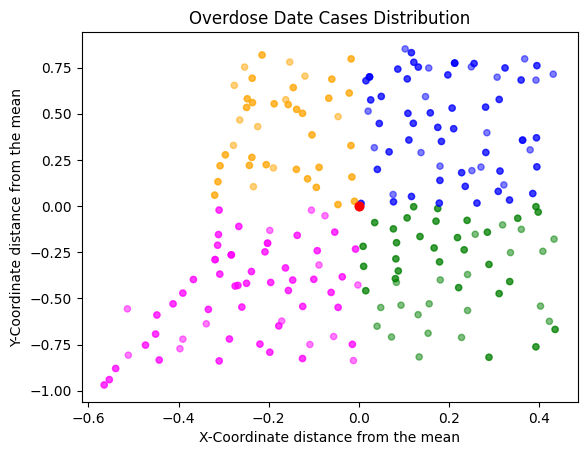

In [549]:
# Plot the data
pd.DataFrame(r_distribution).plot.scatter(x='X', y='Y', alpha=0.5, xlabel='X-Coordinate distance from the mean',
                                          ylabel='Y-Coordinate distance from the mean',
                                          title='Overdose Date Cases Distribution',
                                          color=r_distribution['Color'])
# Mark the mean
plt.plot([0, 0], [0, 0], marker='o', color='red')

# Discussion
The following informations can be concluded from analyzing the graph
* Areas located at Quadrant III (soutwest of the mean) has the highest concentration of drug deaths.
* It can also be noted that Quadrant III has the farthest drug death recorded from the mean.
* Quadrant II and Quadrant IV seems to share similarities.
* Quadrant I drug deaths incidents are more closer to each other and more clumped up.